In [ ]:
from keras.datasets import mnist

In [ ]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
xtrain.shape

(60000, 28, 28)

<function matplotlib.pyplot.show(close=None, block=None)>

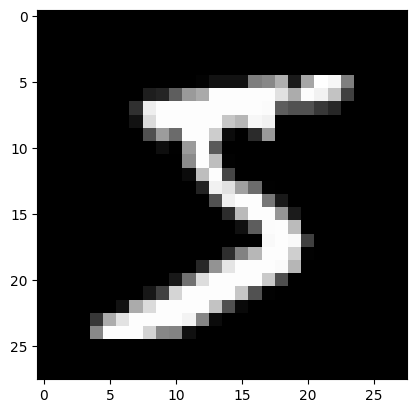

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0],cmap='gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

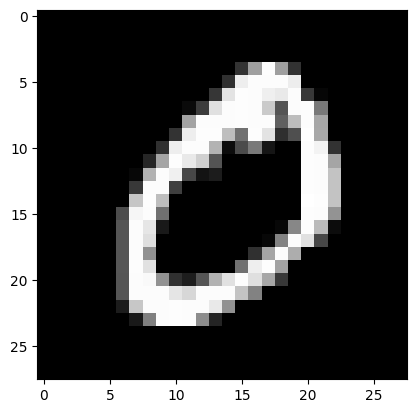

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[1],cmap='gray')
plt.show

In [ ]:
import seaborn as sns

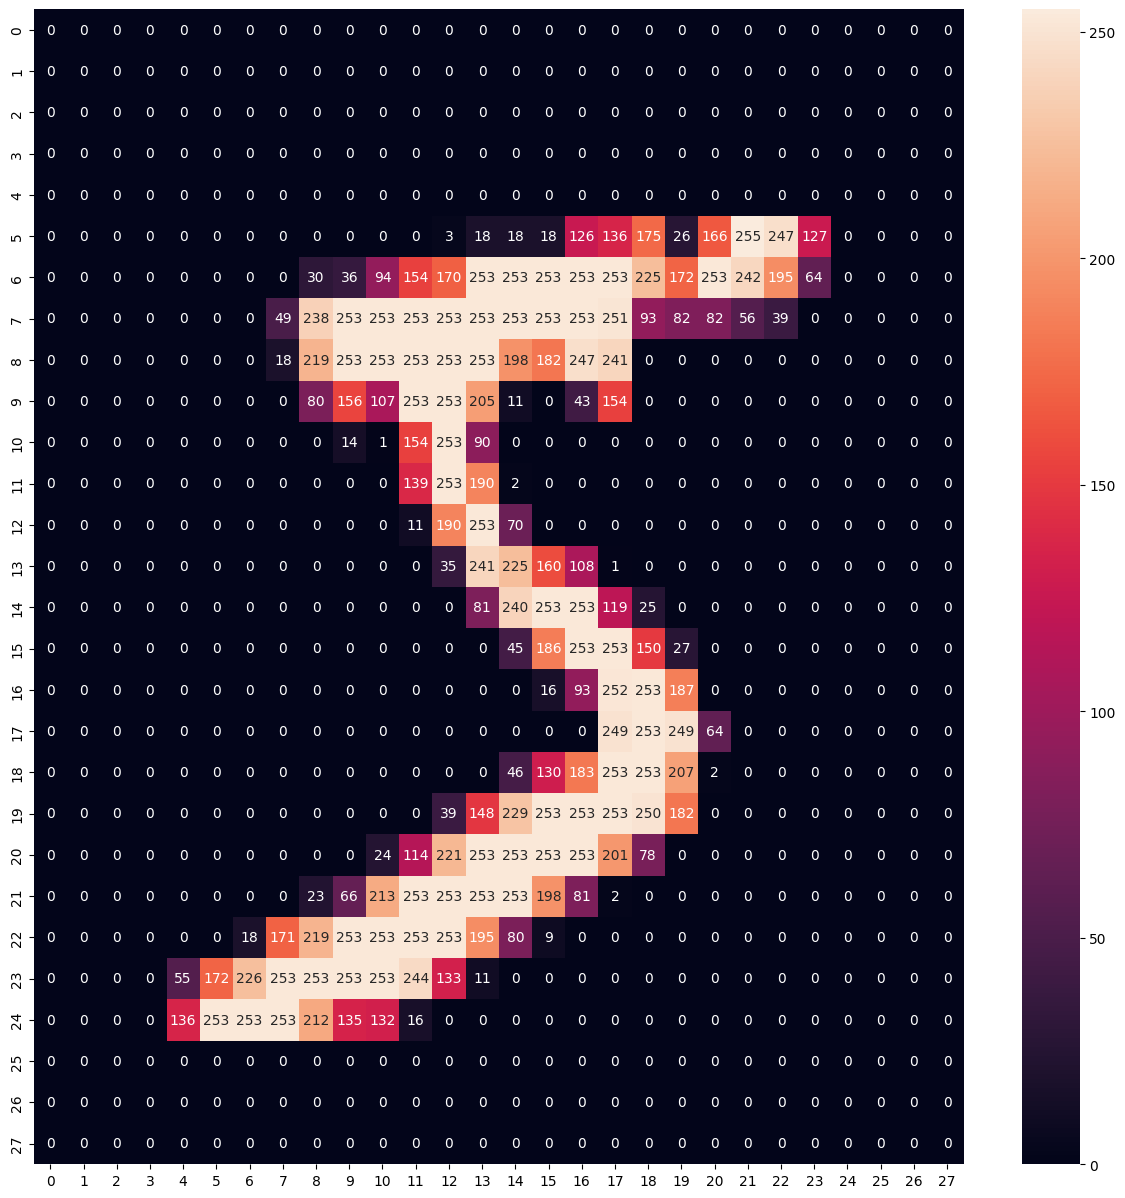

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(xtrain[0],annot=True,fmt='d')
plt.show()

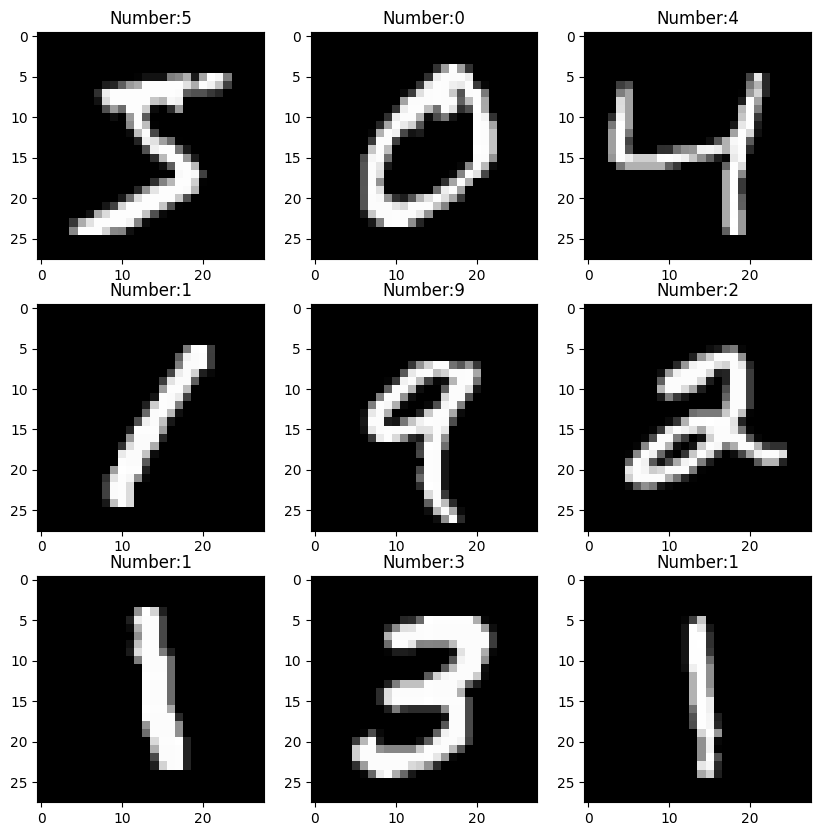

In [ ]:
plt.figure(figsize=(10,10))

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(xtrain[i],cmap='gray')
  plt.title(f'Number:{ytrain[i]}')

In [ ]:
# preprocess

In [ ]:
# pixels are div by 255 to get them in range of 0 to 1

In [ ]:
xtrain_scl=xtrain.astype('float32')/255    # astype is used to change datatype
xtest_scl=xtest.astype('float32')/255

In [ ]:
import numpy as np

In [ ]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# for multiclass classifictaion apply one hot encoding

In [ ]:
from keras.utils import to_categorical
ytrain_cat=to_categorical(ytrain)
ytest_cat=to_categorical(ytest)

In [ ]:
ytrain_cat[0:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [ ]:
ytrain[0:3]

array([5, 0, 4], dtype=uint8)

In [ ]:
# build neural networks

In [ ]:
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPool2D,Flatten,Dropout,Dense

In [ ]:
model=Sequential()

model.add(Input(shape=(28,28,1)))

model.add(Convolution2D(filters=32,activation='relu',kernel_size=(3,3)))

# add maxpooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#add convolution layer 2
model.add(Convolution2D(filters=64,activation='relu',kernel_size=(3,3)))

#add max pooling layer 2
model.add(MaxPool2D(pool_size=(2,2)))

# add a flatten layer
model.add(Flatten())

# add a dropout layer
model.add(Dropout(0.5))

# create an output layer
model.add(Dense(units=ytrain_cat.shape[1],activation='softmax'))


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist =model.fit(xtrain,ytrain_cat,validation_split=0.2,epochs =15)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7836 - loss: 2.6528 - val_accuracy: 0.9735 - val_loss: 0.0864
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9521 - loss: 0.1609 - val_accuracy: 0.9818 - val_loss: 0.0616
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9628 - loss: 0.1192 - val_accuracy: 0.9815 - val_loss: 0.0602
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9671 - loss: 0.1065 - val_accuracy: 0.9851 - val_loss: 0.0510
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9726 - loss: 0.0896 - val_accuracy: 0.9863 - val_loss: 0.0450
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9744 - loss: 0.0841 - val_accuracy: 0.9853 - val_loss: 0.0483
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9756 - loss: 0.0806 - val_accuracy: 0.9872 - val_loss: 0.0426
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9779 - loss: 0.0702 

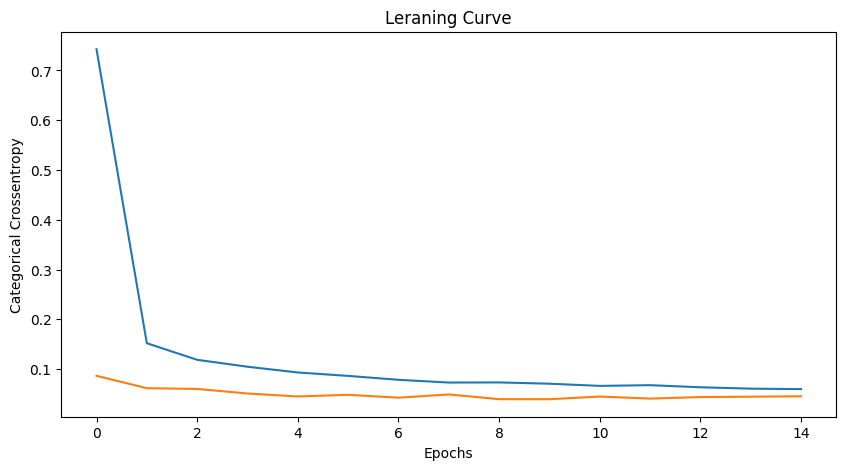

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'],label='Train loss')
plt.plot(hist.history['val_loss'],label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.title('Leraning Curve')
plt.show()

In [ ]:
model.evaluate(xtrain,ytrain_cat)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9947 - loss: 0.0166


[0.022231116890907288, 0.9934999942779541]

In [ ]:
# predict probabilities for training and testing

In [ ]:
yprob_train=model.predict(xtrain)
yprob_test=model.predict(xtest)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
yprob_train[:5]

array([[1.73003868e-11, 2.39090410e-12, 5.81735181e-12, 1.18198795e-05,
        3.11155209e-13, 9.99973536e-01, 2.26322962e-13, 1.31584341e-10,
        1.29966247e-05, 1.67659937e-06],
       [9.99998450e-01, 1.84616133e-14, 1.31563297e-06, 1.72134945e-11,
        9.05791935e-13, 2.07252371e-09, 5.12726892e-08, 4.52894276e-12,
        2.97942453e-08, 2.42097229e-07],
       [6.24961795e-18, 3.20165960e-09, 1.70437655e-12, 1.19954868e-13,
        9.99998569e-01, 1.97491576e-14, 2.16172570e-15, 3.04313588e-08,
        1.72388687e-10, 1.44085072e-06],
       [1.55779098e-10, 9.99990821e-01, 9.84089077e-09, 7.56181576e-12,
        1.29251396e-06, 5.64037463e-11, 5.87027982e-10, 4.99870623e-07,
        7.42629391e-06, 2.35708852e-09],
       [2.53971987e-15, 2.03462233e-13, 1.45272985e-08, 2.01935912e-09,
        2.94146733e-03, 5.54156677e-12, 1.42395754e-16, 5.75129420e-08,
        3.98399316e-05, 9.97018695e-01]], dtype=float32)

In [ ]:
# give final predictions

ypred_train=np.argmax(yprob_train,axis=1)
ypred_test=np.argmax(yprob_test,axis=1)

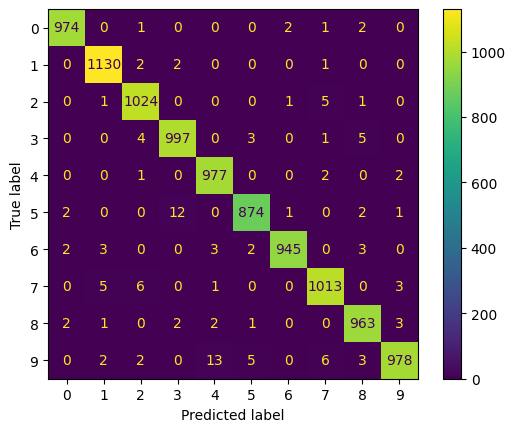

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf=confusion_matrix(ytest,ypred_test)
cfd=ConfusionMatrixDisplay(cf)
cfd.plot()